<a href="https://colab.research.google.com/github/CarlosMR19/Dataset_CoffeBean/blob/main/Prediccion_Calidad_Cafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving df_arabica_clean.csv to df_arabica_clean.csv
   Unnamed: 0  ID Country of Origin                 Farm Name  \
0           0   0          Colombia          Finca El Paraiso   
1           1   1            Taiwan  Royal Bean Geisha Estate   
2           2   2              Laos        OKLAO coffee farms   
3           3   3        Costa Rica                 La Cumbre   
4           4   4          Colombia           Finca Santuario   

                                Lot Number                           Mill  \
0                               CQU2022015               Finca El Paraiso   
1  The 2022 Pacific Rim Coffee Summit,T037       Royal Bean Geisha Estate   
2  The 2022 Pacific Rim Coffee Summit,LA01  oklao coffee processing plant   
3                               CQU2022017        La Montana Tarrazu MIll   
4                               CQU2023002                Finca Santuario   

  ICO Number                   Company   Altitude                Region  ...  \
0        NaN  

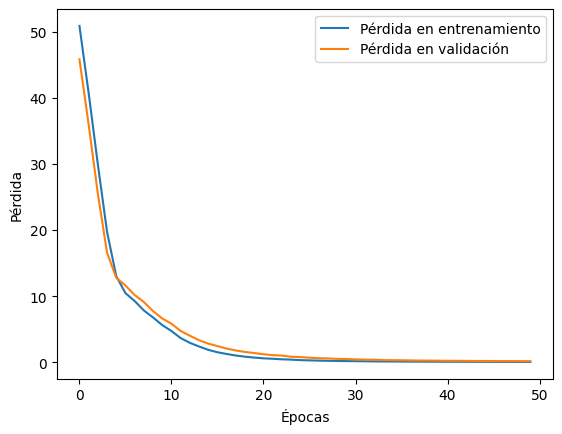

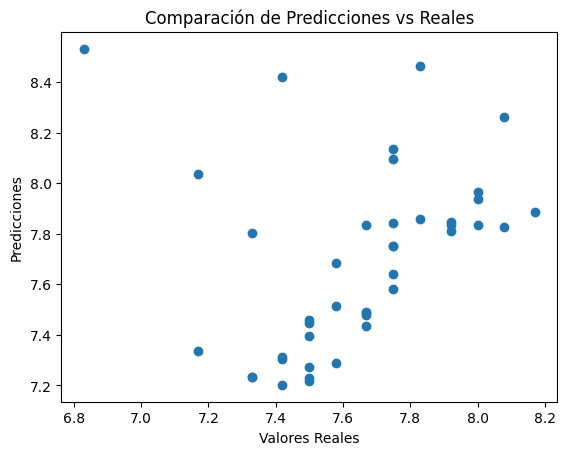

In [ ]:
#instalar librería necesaria
!pip install pandas scikit-learn matplotlib tensorflow


# Paso 1: Subir el archivo CSV a Google Colab
from google.colab import files
uploaded = files.upload()  # Abre un cuadro de diálogo para cargar el archivo CSV desde tu computadora

# Paso 2: Cargar el archivo CSV en un DataFrame
import pandas as pd

# Cargamos el dataset desde el archivo CSV que subimos
df = pd.read_csv('df_arabica_clean.csv')  # Reemplaza con el nombre correcto de tu archivo

# Verificamos las primeras filas del dataset para asegurarnos de que se ha cargado correctamente
print(df.head())

# Paso 3: Limpiar los nombres de las columnas
df.columns = df.columns.str.strip()  # Elimina cualquier espacio al principio o final de los nombres de las columnas

# Verificamos nuevamente las columnas para asegurar que todo esté correcto después de la limpieza
print(df.columns)

# Paso 4: Seleccionar las características de entrada (columnas sensoriales) y la variable objetivo (calidad)
X = df[['Aroma', 'Flavor', 'Acidity', 'Body', 'Sweetness']]  # Características sensoriales del café
y = df['Overall']  # Variable objetivo, en este caso 'Overall' representa la puntuación total de calidad

# Paso 5: Dividir los datos en conjunto de entrenamiento y prueba (80% para entrenamiento y 20% para prueba)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizamos las características para mejorar la precisión del modelo
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Ajustamos el scaler a los datos de entrenamiento
X_test = scaler.transform(X_test)  # Aplicamos la misma transformación a los datos de prueba

# Paso 6: Crear y compilar el modelo de red neuronal
import tensorflow as tf
from tensorflow.keras import layers, models

# Definimos un modelo secuencial con dos capas ocultas y una capa de salida
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Capa densa con 64 neuronas
    layers.Dense(32, activation='relu'),  # Capa densa con 32 neuronas
    layers.Dense(1)  # Capa de salida con 1 neurona, ya que estamos prediciendo un valor continuo
])

# Compilamos el modelo usando el optimizador 'adam' y la pérdida 'mean_squared_error' para regresión
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])  # 'mae' (error absoluto medio) para medir la precisión

# Paso 7: Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)  # Entrenamos el modelo durante 50 épocas

# Paso 8: Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)  # Realizamos las predicciones con el conjunto de prueba

# Calculamos métricas de desempeño
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)  # Error absoluto medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R^2
print(f'MAE: {mae:.2f}')  # Imprimimos el MAE
print(f'R^2: {r2:.2f}')  # Imprimimos el valor R^2, que indica la precisión del modelo

# Paso 9: Gráfico de pérdida durante el entrenamiento
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')  # Gráfico de la pérdida en el entrenamiento
plt.plot(history.history['val_loss'], label='Pérdida en validación')  # Gráfico de la pérdida en la validación
plt.legend()
plt.xlabel('Épocas')  # Etiqueta del eje x
plt.ylabel('Pérdida')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

# Paso 10: Comparar valores reales vs predichos
plt.scatter(y_test, y_pred)  # Gráfico de dispersión comparando los valores reales con las predicciones
plt.xlabel('Valores Reales')  # Etiqueta del eje x
plt.ylabel('Predicciones')  # Etiqueta del eje y
plt.title('Comparación de Predicciones vs Reales')  # Título del gráfico
plt.show()  # Mostrar el gráfico